# Context
Classification of land covers is an important question in several scientifict fields. Remote sensing offers the possibility to cover large geographical scale, at a reduce cost, and allows mapping of landscapes on a regular basis. It is possible, using data analysis tools, to associate to each pixel of the image a pre-defined land-cover.

Machine learning algorithms are conventionaly applied to derive pixel-wise land cover automatically. However, on data source may be enough for an accurate mapping. Hence, multisource data sets may offers different and complementary information of the nature and state of the landscape.

In this project, it is proposed to use several source of information for the classification of the land cover. First the original hyperspectral image is given which provide an accurate description of the physical nature of the observed material. Second, several data set containing various spatial feature extracted from the original data are proposed. As a complementary source of information, they provide information about the spatial organisation of the image.

The objective of the project is to fuse these different source of information for the classification of land cover. Two strategies are proposed here:
- *Feature fusion*: For that strategy, the different feature are concatenated before the classification. Then a "big" feature vector is given to the classifier.
- *Decision fusion*: For decision fusion, each data source is classified independently and the outputs, posterior probabilities or class membership, are fused using a fusion rule. For the class membership, a majority voting rule will be applied. For the posterior probabilities, the max and product rule will be used.

# Data sets
Several data sets are provided, they correspond the Pavia University data set.

In [1]:
ls -lth *tif

-rw-r--r-- 1 mfauvel mfauvel  43M mars  31  2017 emp_pca_university.tif
-rw-r--r-- 1 mfauvel mfauvel 2,4M mars  18  2017 pca_std_3_3_university.tif
-rw-r--r-- 1 mfauvel mfauvel 204K mars  11  2017 university_gt.tif
-rw-r--r-- 1 mfauvel mfauvel  41M févr. 26  2017 university.tif


The files:
1. "university.tif" contains the original hyperspectral image.
2. "university_gt.tif" contains the reference data, i.e., some referenced pixels used for training and validation.
3. "pca_std_3_3_university.tif" contains the loca standard deviation computed on the three first principal axes.
4. "emp_pca_university.tif" contains the morphological profile, i.e., a feature that provide information abou the size and the orientation of the object in the object.

The two last data sets provide information abou the spatial organization of the image. The toolbox *rasterTools.py* provide some function to read or write geotiff data and to extract into scipy array the referenced pixels.

Data dimension (610, 340, 103)


[]

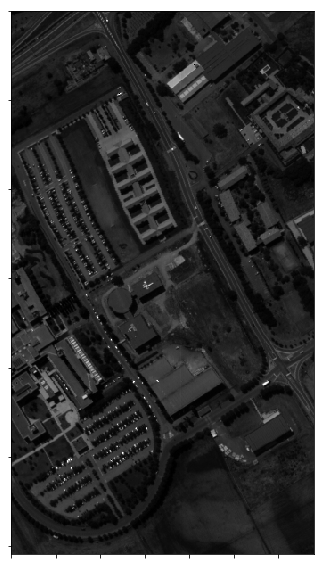

In [11]:
import rasterTools as rt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)

# Load and discplay the original data
im, GeoT, Proj = rt.open_data('university.tif') # Load the image
print("Data dimension {}".format(im.shape))

fig, ax = plt.subplots()
ax.imshow(im[:,:,50],cmap="gray")
ax.set_xticklabels([])
ax.set_yticklabels([])

The image has 610 lines, 340 columns and 103 wavelength. Hence, each pixel has 103 spectral features. Below is plotted the spectral variable for a given pixel.

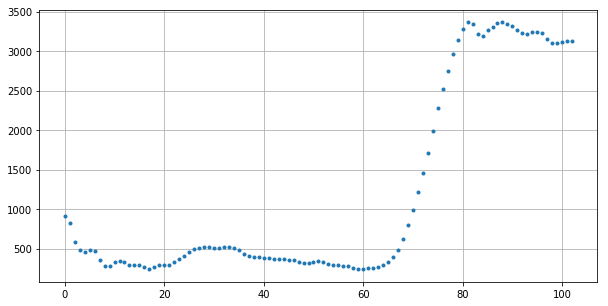

In [3]:
plt.figure(figsize=(10,5))
plt.plot(im[40,200,:],'.')
plt.grid()

We now plot the reference image. Each non nul pixel is a reference pixel, and number correspond to different classes. The table below provide the class name.

|# |	Class 	|
|--|------------|
|1 |	Asphalt |
|2 |	Meadows |
|3 |	Gravel 	|
|4 |	Trees 	|
|5 |	Painted metal sheets |
|6 |	Bare Soil |
|7 |	Bitumen |
|8 |	Self-Blocking Bricks |
|9 |	Shadows |

Data dimension (610, 340)


[]

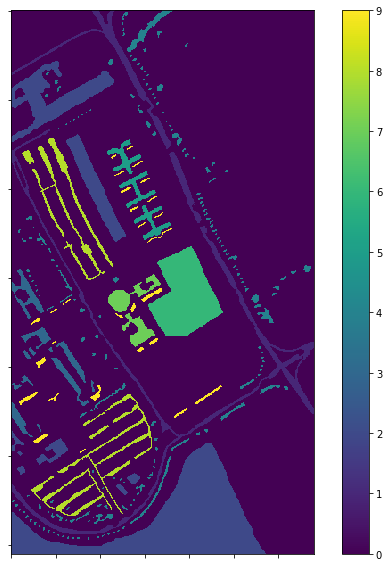

In [4]:
# Load and discplay the original data
gt, GeoT, Proj = rt.open_data('university_gt.tif') # Load the image
print("Data dimension {}".format(gt.shape))

fig, ax = plt.subplots()
plt.colorbar(ax.imshow(gt[:,:]))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Read and write data sets
The rasterTools.py file provide the necessary functions to read, write and extract data set. The following lines show how to load scipy arrays with the pixels and their label. These will be used to learn your classifer (after a propoer "split"...)

In [5]:
# Extract referenced pixel from "university.tif"
X, y = rt.get_samples_from_roi('./university.tif','./university_gt.tif')
print("Number of referenced pixels {}\nNumber of features {}".format(X.shape[0],X.shape[1]))

Number of referenced pixels 42776
Number of features 103


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

data = train_test_split(X, y,
                        train_size=0.05,
                        random_state=0,
                        stratify=y)

# Classification using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(data[0], data[2])
y_pred = clf.predict(data[1])
accuracy_score(data[3], y_pred)

0.82942073920960679

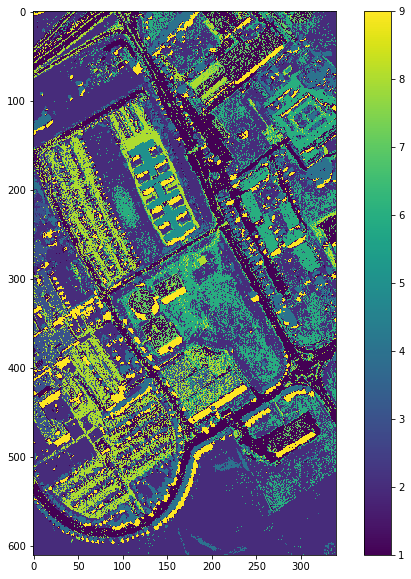

In [13]:
# Classify the whole image
[w,h,b] = im.shape
land_cover = clf.predict(im.reshape(w*h, b))
fig, ax = plt.subplots()
plt.colorbar(ax.imshow(land_cover.reshape(w,h)))

# Work
1. Classify each source separately,
2. Data fusion:
    1. Feature fusion: concatenate each data source and perform the classification on the concatetanted data set (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html)
    2. Decision fusion:
        1. Using *majority* voting rule, fuse the hard outputs, i.e., the label provided by each classifier
        2. Using the probabilistisc outputs of each classifiers: use the following rule
            - Average
            - Product
        3. Feel free to implement any rules!
 
Use the different tools provided by scikit-learn (confusion_matrix, F1_score, OA ...) to quantify the complementarity of each source. Also, using the example above, in addition to the quantitative assessment, check visualy the final classification.